In [ ]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-l_xug8l4
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-l_xug8l4
     |████████████████████████████████| 634kB 6.4MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65168 sha256=ed0ec946ab12f006ea993c7a7853b8069c28f7bdce679e3bc6c1874f796b75b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-p5ynfqlm/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=051eed3c9f2f1758ed969f51543c9a30f24a88b3b984976240c6250486df8db7
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
  

In [1]:
import sys
sys.path.append('/content/drive/My Drive/EVA4S10')

cuda


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Finished loading data
('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
shape: torch.Size([128, 3, 32, 32])


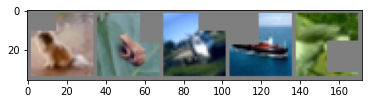

In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.optim as optim
from torchsummary import summary
from torch.optim.lr_scheduler import StepLR
# Importing Modules 
%matplotlib inline
import data as d 
import show_images as s 
import model as m 
import train_test as t 
import misclassified_image as mi
#import grad_cam as g 
import epoc as e

cuda


  0%|          | 0/391 [00:00<?, ?it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

Loss=1.911643624305725 Batch_id=390 Accuracy=18.63: 100%|██████████| 391/391 [03:19<00:00,  1.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0147, Accuracy: 2968/10000 (29.68%)

EPOCH: 1
Device: cuda


Loss=1.7982991933822632 Batch_id=390 Accuracy=32.24: 100%|██████████| 391/391 [03:20<00:00,  1.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0124, Accuracy: 4275/10000 (42.75%)

EPOCH: 2
Device: cuda


Loss=1.4799479246139526 Batch_id=390 Accuracy=38.65: 100%|██████████| 391/391 [03:19<00:00,  1.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 4837/10000 (48.37%)

EPOCH: 3
Device: cuda


Loss=1.4840645790100098 Batch_id=390 Accuracy=44.67: 100%|██████████| 391/391 [03:21<00:00,  1.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0105, Accuracy: 5177/10000 (51.77%)

EPOCH: 4
Device: cuda


Loss=1.2933385372161865 Batch_id=390 Accuracy=51.22: 100%|██████████| 391/391 [03:19<00:00,  1.96it/s]



Test set: Average loss: 0.0090, Accuracy: 6085/10000 (60.85%)



/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


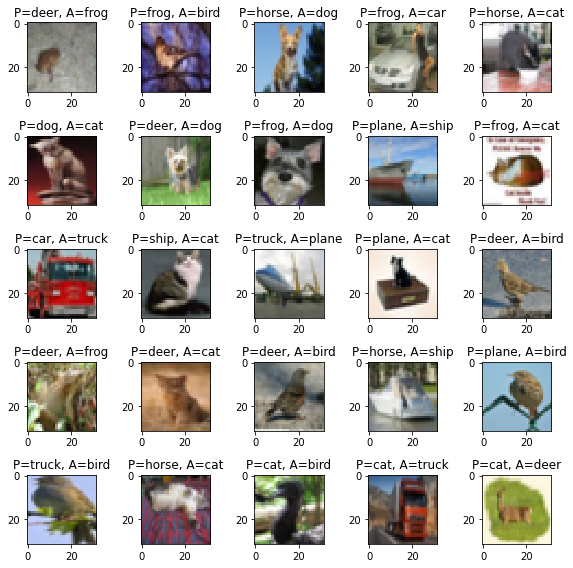

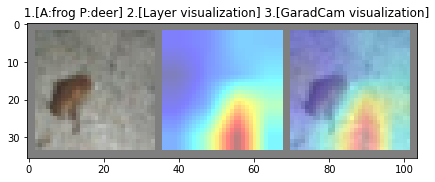

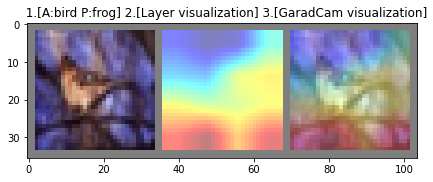

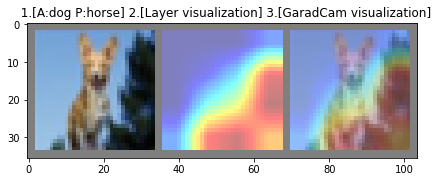

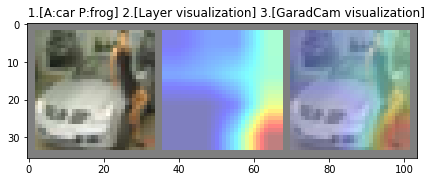

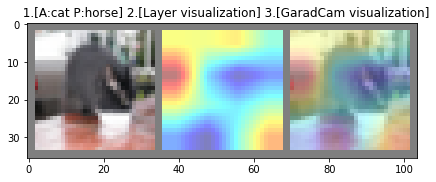

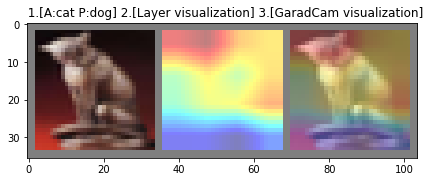

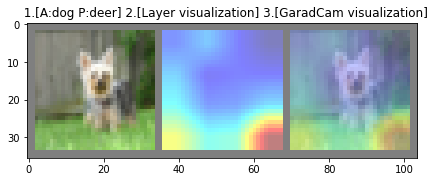

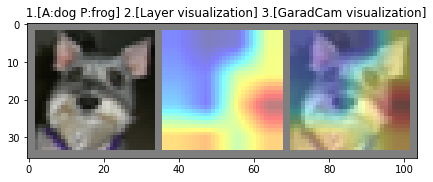

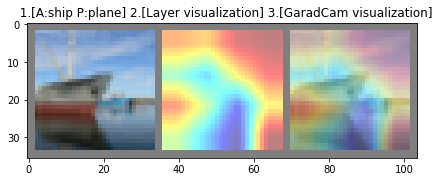

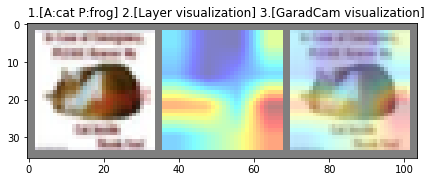

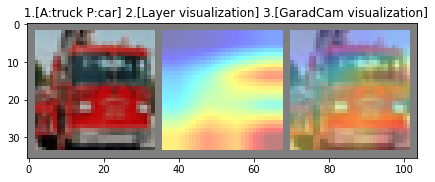

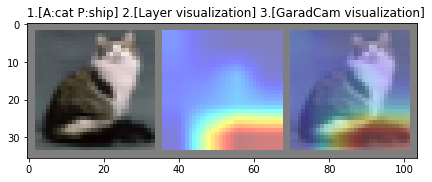

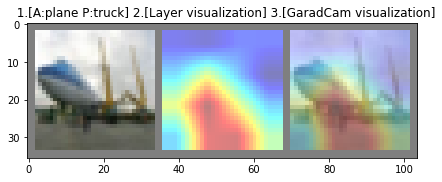

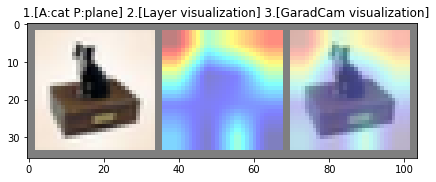

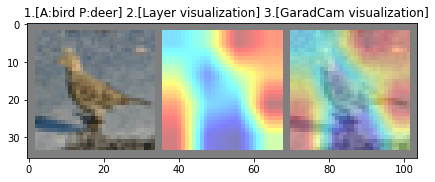

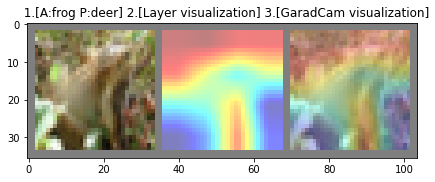

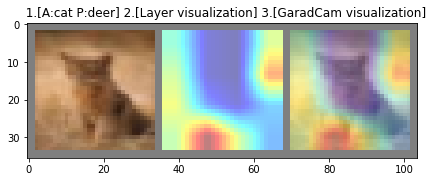

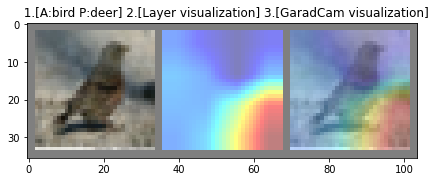

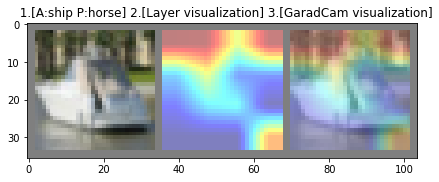

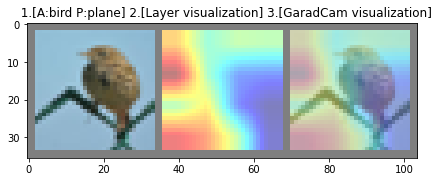

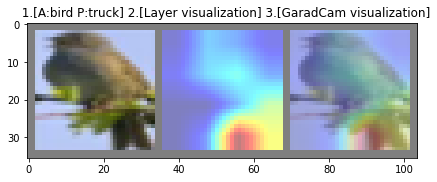

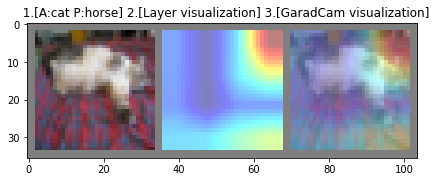

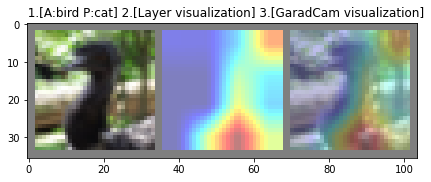

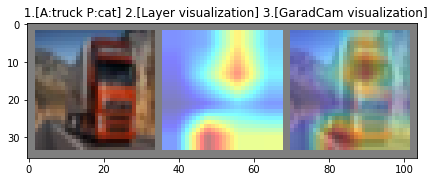

In [ ]:
e.ep()

In [ ]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
def image_show(img, title=None, download_image=None):
        fig = plt.figure(figsize=(7, 7))
        img = img / 2 + 0.5  # unnormalize
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)), interpolation='none')
        if title is not None:
            plt.title(title)
        plt.pause(0.001)
        #if download_image:
            #fig.savefig(download_image)
            #files.download(download_image)

from grad_cam import *
num_img = 25
for index in range(num_img):
  images = []
  grad_cam1 = GradCAM(e.model, e.model.layer4)
  mask, _ = grad_cam1(torch.stack([mi.misclassified_images[index][0]]))
  heatmap, result = visualize_cam(mask, mi.misclassified_images[index][0])
  images.extend([mi.misclassified_images[index][0].cpu(), heatmap, result])
  label = "  1.[A:{0} P:{1}] 2.[Layer visualization] 3.[GaradCam visualization]".format(e.classes[mi.misclassified_images[index][2].item()],e.classes[mi.misclassified_images[index][1].item()])
  image_show(make_grid(images, nrow=5), title=label, download_image="gradcam_misclassified.png")